<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Unit_1_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
# data downloaded for free from 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
# data downloaded for free from 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'

In [5]:
from google.colab import files
uploaded = files.upload()

Saving estoxx clean.txt to estoxx clean.txt


In [0]:
vs = pd.read_csv('vstoxx_hist.txt',header=2,parse_dates=True,sep=',')
vs['Date'] = pd.to_datetime(vs['Date'],format='%d.%m.%Y')


In [0]:
stoxx=pd.read_csv('estoxx clean.txt',skiprows=3,parse_dates=True,sep=';')
stoxx.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
#stoxx = df.drop([7535, 7536]) #dropping rows with 0 values
stoxx['Date'] = pd.to_datetime(stoxx['Date'],format='%d.%m.%Y')
stoxx = stoxx.reset_index(drop=True)

In [62]:
import datetime as dt
df = stoxx[stoxx['Date']>dt.datetime(1999,1,1)].copy()
df = pd.merge(df,vs,on='Date',how='outer')
df = df.set_index('Date')
df = df.fillna(method='ffill')
df = df.drop(dt.datetime(2016,3,25)) #dropping good friday as prices are zeros
df = df.drop(dt.datetime(2016,3,28)) #and easter monday 2016
df = df.set_value(dt.datetime(2006,6,21),'V6I1',29.4794)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [64]:
df.head()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,,,,,,,,,
1999-01-04,3474.14,3543.10,287.81,313.92,326.93,261.55,3968.54,300.47,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,3535.30,3604.67,291.40,316.97,331.00,265.68,4030.95,305.37,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,3615.93,3685.36,298.11,323.16,336.96,272.98,4068.85,308.34,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,3566.02,3627.87,294.55,318.27,332.70,270.80,4100.77,311.57,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,3569.24,3616.57,296.03,318.02,333.38,274.12,4126.04,313.56,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672


In [0]:
usdata = data.DataReader(["^GSPC", "^VIX"], "yahoo",start='1999-1-1')

In [17]:
usdata.head()

Attributes         High                     Low                    Open  \
Symbols           ^GSPC       ^VIX        ^GSPC       ^VIX        ^GSPC   
Date                                                                      
1999-01-04  1248.810059  26.959999  1219.099976  24.740000  1229.229980   
1999-01-05  1246.109985  25.980000  1228.099976  24.360001  1228.099976   
1999-01-06  1272.500000  23.379999  1244.780029  22.680000  1244.780029   
1999-01-07  1272.339966  24.900000  1257.680054  24.040001  1272.339966   
1999-01-08  1278.239990  24.080000  1261.819946  22.809999  1269.729980   

Attributes                   Close                Volume         Adj Close  \
Symbols          ^VIX        ^GSPC       ^VIX      ^GSPC ^VIX        ^GSPC   
Date                                                                         
1999-01-04  25.379999  1228.099976  26.170000  877000000    0  1228.099976   
1999-01-05  25.920000  1244.780029  24.459999  775000000    0  1244.780029   
1999-01-06  23.360001  1272.339966  23.340000  986900000    0  1272.339966   
1999-01-07  24.420000  1269.729980  24.370001  863000000    0  1269.729980   
1999-01-08  22.950001  1275.089966  23.280001  937800000    0  1275.089966   

Attributes             
Symbols          ^VIX  
Date                   
1999-01-04  26.170000  
1999-01-05  24.459999  
1999-01-06  23.340000  
1999-01-07  24.370001  
1999-01-08  23.280001

In [22]:
usdata.columns

MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['^GSPC', '^VIX']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['Attributes', 'Symbols'])

In [0]:
df_strip = df.copy()[['SX5E','V2TX']]

In [0]:
usdata_strip = usdata['Close'].copy()[:4466]
usdata_strip.columns=['S&P500','VIX']
#usdata_strip.columns = usdata_strip.columns.droplevel()

In [54]:
usdata_strip.head()

,S&P500,VIX
Date,,
1999-01-04,1228.099976,26.170000
1999-01-05,1244.780029,24.459999
1999-01-06,1272.339966,23.340000
1999-01-07,1269.729980,24.370001
1999-01-08,1275.089966,23.280001


In [0]:
mf = pd.merge(df_strip,usdata_strip,on='Date',how='outer')

In [67]:
mf.head()

,SX5E,V2TX,S&P500,VIX
Date,,,,
1999-01-04,3543.10,18.2033,1228.099976,26.170000
1999-01-05,3604.67,29.6912,1244.780029,24.459999
1999-01-06,3685.36,25.1670,1272.339966,23.340000
1999-01-07,3627.87,32.5205,1269.729980,24.370001
1999-01-08,3616.57,33.2296,1275.089966,23.280001


In [68]:
logs = np.log(mf/mf.shift(1))
logs=logs.dropna()

logs.head()

,SX5E,V2TX,S&P500,VIX
Date,,,,
1999-01-05,0.017228,0.489248,0.013491,-0.067575
1999-01-06,0.022138,-0.165317,0.021899,-0.046870
1999-01-07,-0.015723,0.256337,-0.002053,0.043184
1999-01-08,-0.003120,0.021570,0.004212,-0.045758
1999-01-11,-0.019593,0.103173,-0.008830,0.089514


In [69]:
logs.describe()

,SX5E,V2TX,S&P500,VIX
count,4313.000000,4313.000000,4313.000000,4313.000000
mean,-0.000047,-0.000378,0.000138,-0.001239
std,0.015059,0.056860,0.012479,0.065818
min,-0.090110,-0.326505,-0.094695,-0.350589
25%,-0.007501,-0.033819,-0.005545,-0.038733
50%,0.000230,-0.002415,0.000506,-0.005316
75%,0.007830,0.027039,0.006032,0.031615
max,0.104376,0.489248,0.109572,0.496008


In [70]:
logs.corr().head()

,SX5E,V2TX,S&P500,VIX
SX5E,1.000000,-0.721534,0.583362,-0.474611
V2TX,-0.721534,1.000000,-0.427889,0.514786
S&P500,0.583362,-0.427889,1.000000,-0.750662
VIX,-0.474611,0.514786,-0.750662,1.000000


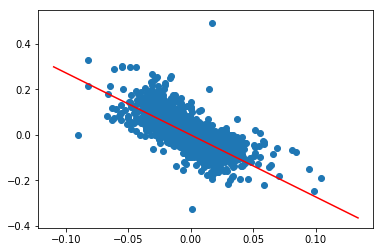

In [79]:
from sklearn.linear_model import LinearRegression
X=logs['SX5E'].values.reshape(-1, 1)
y=logs['V2TX'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)
reg.score(X,y)
plt.scatter(logs['SX5E'],logs['V2TX'])
ax_logs = plt.axis()
x_reg = np.linspace(ax_logs[0],ax_logs[1]+0.01 )
slope = reg.coef_[0][0]
intercept = reg.intercept_[0]
  
plt.plot(x_reg, intercept+slope*x_reg,c='r');

In [80]:
reg.score(X,y)

0.5206113344914376

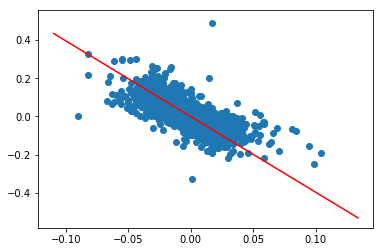

In [78]:
XX=logs['S&P500'].values.reshape(-1, 1)
yy=logs['VIX'].values.reshape(-1, 1)

reg2 = LinearRegression().fit(XX, yy)
reg2.score(XX,yy)
plt.scatter(logs['SX5E'],logs['V2TX'])
ax_logs2 = plt.axis()
x_reg2 = np.linspace(ax_logs2[0],ax_logs[1]+0.01 )
slope2 = reg2.coef_[0][0]
intercept2=reg2.intercept_[0]
  
plt.plot(x_reg2, intercept2+slope2*x_reg2,c='r');

In [81]:
reg2.score(XX,yy)

0.5634929191196121